In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

def show_torch_info():
    print(f"Torch v.{torch.__version__}")
    print(f"Cuda avialiable: {torch.cuda.is_available()}")

show_torch_info()

Torch v.1.12.1
Cuda avialiable: False


### XOR binary classifier
Note: https://lecture-demo.ira.uka.de/neural-network-demo/?preset=Binary%20Classifier%20for%20XOR

In [2]:
#data
class XORData(torch.utils.data.IterableDataset):
    def __init__(self):
        super().__init__()
        self.xor_values = [
            (torch.tensor([0.,0.]), torch.tensor([0.])),
            (torch.tensor([0.,1.]), torch.tensor([1.])),
            (torch.tensor([1.,0.]), torch.tensor([1.])),
            (torch.tensor([1.,1.]), torch.tensor([0.])),
        ]

    def __iter__(self):
        return iter(self.xor_values)

training_set = XORData()

In [3]:
class XORBinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.l = nn.Linear(2,2)
        self.out = nn.Linear(2,1)
    
    def forward(self, t):
        t = torch.sigmoid(self.l(t))
        t = torch.sigmoid(self.out(t))
        return t

print(XORBinaryClassifier())

XORBinaryClassifier(
  (l): Linear(in_features=2, out_features=2, bias=True)
  (out): Linear(in_features=2, out_features=1, bias=True)
)


In [28]:
network = XORBinaryClassifier()
training_loader = torch.utils.data.DataLoader(training_set, batch_size=1)
optimizer = optim.SGD(network.parameters(), lr=0.05)
loss_f = nn.MSELoss()
NUM_EPOCHS = 600

In [29]:
losses_history = []
for epoch in range(NUM_EPOCHS):
    total_loss = 0
    for batch in training_loader:
        inputs, expected = batch
        predictions = network(inputs)
        loss = loss_f(predictions, expected)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
    losses_history.append(total_loss)

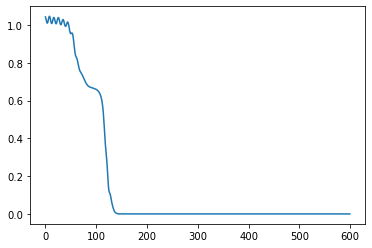

In [30]:
import matplotlib.pyplot as plt
plt.plot([l for l in losses_history])
plt.show()